# Chapter 6

## 6E1

State three motivating criteria that define information entropy. Try to express each in your own words.

* Should be continuous - a small change in a probability should not lead to a huge change in entropy

* Should increase as the number of possible event increases

* Additive. uncertainty of two different dimensions should sum up at dimension1 + dimension2

## 6E2
Suppose a coin is weighted such that, when it is tossed and lands on a table, it comes up with heads 70% of the time. What is the entropy of this coin?

In [2]:
p <- c(0.3, 0.7)
-sum(p*log(p))

[1] 0.6108643

## 6E3
Suppose that a four sided die i loaded such that, when tossed onto a table, it shows "1" 20% of the time, "2" 25% of the time, "3" 25% of the time, "4" 30% of the time. What is the entropy of this die?


In [3]:
p <- c(.2, .25, .25, .3)
-sum(p*log(p))

[1] 1.376227

## 6E4 

Suppose another four-sided die is loaded such that it never shows "4". The other three sides show equally often. What is the entropy of this die?

In [4]:
p <- c(1/3, 1/3, 1/3)
-sum(p*log(p))

[1] 1.098612

## 6M1 

Write down and compare the definitions of AIC, DIC and WAIC. Which of these criteria is most general? Which assumptions are required to transform a more general criterion into a less general one?

$$AIC = D_{train} + 2p$$

$$DIC = \overline{\mbox{D}} + p_D$$

$$p_D = \overline{\mbox{D}} - \hat{\mbox{D}}$$

$$WAIC: -2(lppd - p_{WAIC})$$

$$lppd = \sum_{i=1}^{N}logPr(y_i)$$

$$p_{WAIC} = \sum_{i=1}^{N}V(y_i)$$

$$V(y_i) = variance$$

$AIC$ is $DIC$ with flat priors (lecture 8 33.00)

DIC is is WAIC but using the posterior mean

## 6M2
Explain the difference between model selection and model averaging. What information is lost under model selection? What information is lost under model averaging?


In [5]:
library(rethinking)
data(Howell1)
d <- Howell1
d$age <- (d$age - mean(d$age))/ sd(d$age)
d$age2 <- d$age ** 2
d$age3 <- d$age ** 3
d$age4 <- d$age ** 4
d$age5 <- d$age ** 5
d$age6 <- d$age ** 6
set.seed(1000)
i <- sample(1:nrow(d), size = nrow(d) / 2)
d1 <- d[i,]
d2 <- d[-i,]


Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.59)


## 6M3

When comparing models with an information criterion, why must all models be fit to exactly the same observations? What would happen to the information criterion values, if the models were fit to different numbers of observations? Perform some experiments if you are not sure.


In [7]:
m6M3.1 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age^2 + b3*age^3 + b4*age^4,
    a ~ dnorm(150,100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    b3 ~ dnorm(0,100),
    b4 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [8]:
m6M3.2 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age^2 + b3*age^3 + b4*age^4,
    a ~ dnorm(150,100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    b3 ~ dnorm(0,100),
    b4 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d
)

In [9]:
WAIC(m6M3.1)

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 1926.415
attr(,"lppd")
[1] -957.3932
attr(,"pWAIC")
[1] 5.814487
attr(,"se")
[1] 25.50308

In [10]:
WAIC(m6M3.2)

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 3798.366
attr(,"lppd")
[1] -1893.29
attr(,"pWAIC")
[1] 5.893501
attr(,"se")
[1] 33.64343

WAIC is much higher with higher number of observations. (double?)

## 6M4
What happens to the effective number of parameters, as measured by DIC or WAIC, as a prior becomes more concentrated? Why? Perform some experiments, if you are not sure.


In [11]:
m6M4.1 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age^2 + b3*age^3 + b4*age^4,
    a ~ dnorm(150,100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    b3 ~ dnorm(0,100),
    b4 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [12]:
WAIC(m6M4.1)

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 1926.058
attr(,"lppd")
[1] -957.4217
attr(,"pWAIC")
[1] 5.607183
attr(,"se")
[1] 25.46517

In [13]:
m6M4.2 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age^2 + b3*age^3 + b4*age^4,
    a ~ dnorm(155,5),
    b1 ~ dnorm(5,5),
    b2 ~ dnorm(-20,20),
    b3 ~ dnorm(12,10),
    b4 ~ dnorm(-2,10),
    sigma ~ dunif(0,40)
  ),
  data = d1
)

In [14]:
WAIC(m6M4.2)

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 1926.2
attr(,"lppd")
[1] -957.4228
attr(,"pWAIC")
[1] 5.677007
attr(,"se")
[1] 25.44625

It gets lower with more regularizing priors

## 6M5

Provide an informal explanation of why informative priors reduce overfitting.



Informative priors will make the model more conservative, so it will be resistant to signals.

## 6M6
Provide and informalexplanation of why overly informative priors result in overfitting.


## 6H1

In [23]:
m6H1.1 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age ,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [24]:
m6H1.2 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age2 ,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [25]:
m6H1.3 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age2 + b3*age3 ,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    b3 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [26]:
m6H1.4 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age2 + b3*age3 + b4*age4,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    b3 ~ dnorm(0,100),
    b4 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [27]:
m6H1.5 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age2 + b3*age3 + b4*age4 + b5*age5,
    a ~ dnorm(0,100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    b3 ~ dnorm(0,100),
    b4 ~ dnorm(0,100),
    b5 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [28]:
m6H1.6 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age2 + b3*age3 + b4*age4 + b5*age5 + b6*age6,
    a ~ dnorm(0, 100),
    b1 ~ dnorm(0,100),
    b2 ~ dnorm(0,100),
    b3 ~ dnorm(0,100),
    b4 ~ dnorm(0,100),
    b5 ~ dnorm(0,100),
    b6 ~ dnorm(0,100),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

In [29]:
stancode(m6H1.6)

data{
    int<lower=1> N;
    real height[N];
    real age[N];
    real age2[N];
    real age3[N];
    real age4[N];
    real age5[N];
    real age6[N];
}
parameters{
    real a;
    real b1;
    real b2;
    real b3;
    real b4;
    real b5;
    real b6;
    real<lower=0,upper=50> sigma;
}
model{
    vector[N] mu;
    // sigma ~ uniform( 0 , 50 );
    b6 ~ normal( 0 , 100 );
    b5 ~ normal( 0 , 100 );
    b4 ~ normal( 0 , 100 );
    b3 ~ normal( 0 , 100 );
    b2 ~ normal( 0 , 100 );
    b1 ~ normal( 0 , 100 );
    a ~ normal( 0 , 100 );
    for ( i in 1:N ) {
        mu[i] = a + b1 * age[i] + b2 * age2[i] + b3 * age3[i] + b4 * age4[i] + b5 * age5[i] +      b6 * age6[i];
    }
    height ~ normal( mu , sigma );
}
generated quantities{
    vector[N] mu;
    real dev;
    dev = 0;
    for ( i in 1:N ) {
        mu[i] = a + b1 * age[i] + b2 * age2[i] + b3 * age3[i] + b4 * age4[i] + b5 * age5[i] +      b6 * age6[i];
    }
    dev = dev + (-2)*normal_lpdf( height | mu , sigma );
}


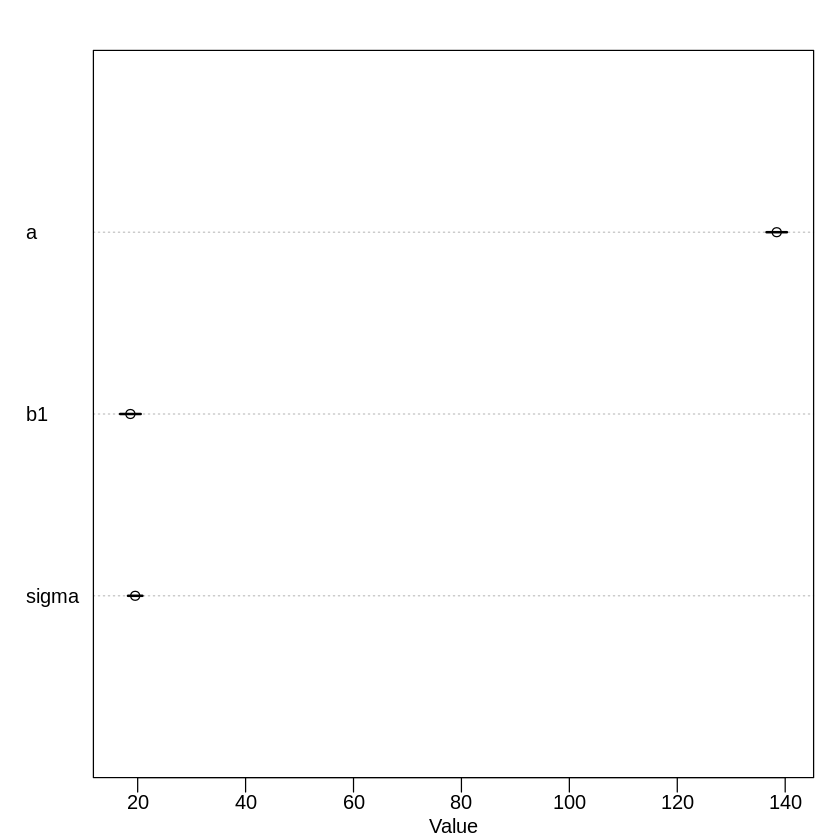

In [30]:
plot(precis(m6H1.1))

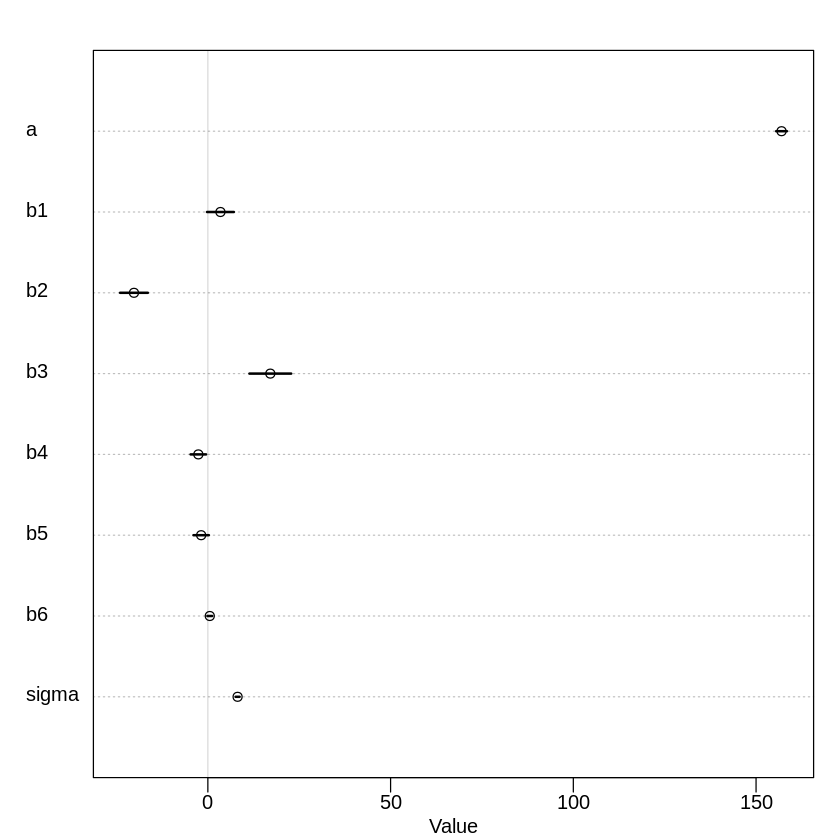

In [31]:
plot(precis(m6H1.6))

In [32]:
WAIC(m6H1.1)

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 2395.692
attr(,"lppd")
[1] -1194.306
attr(,"pWAIC")
[1] 3.540708
attr(,"se")
[1] 22.99375

In [33]:
WAIC(m6H1.2)

Constructing posterior predictions


[ 1000 / 1000 ]


[1] 2150.197
attr(,"lppd")
[1] -1069.764
attr(,"pWAIC")
[1] 5.334416
attr(,"se")
[1] 22.56107

In [78]:
(models <- compare(m6H1.1,m6H1.2,m6H1.3,m6H1.4,m6H1.5,m6H1.6))

         WAIC pWAIC dWAIC weight    SE   dSE
m6H1.4 1926.3   5.8   0.0   0.51 25.44    NA
m6H1.5 1927.6   6.5   1.3   0.27 25.58  1.14
m6H1.6 1927.9   7.5   1.6   0.22 25.13  2.80
m6H1.3 1952.9   5.7  26.6   0.00 24.31 10.93
m6H1.2 2150.3   5.4 224.0   0.00 22.55 26.77
m6H1.1 2395.5   3.4 469.2   0.00 22.97 31.13

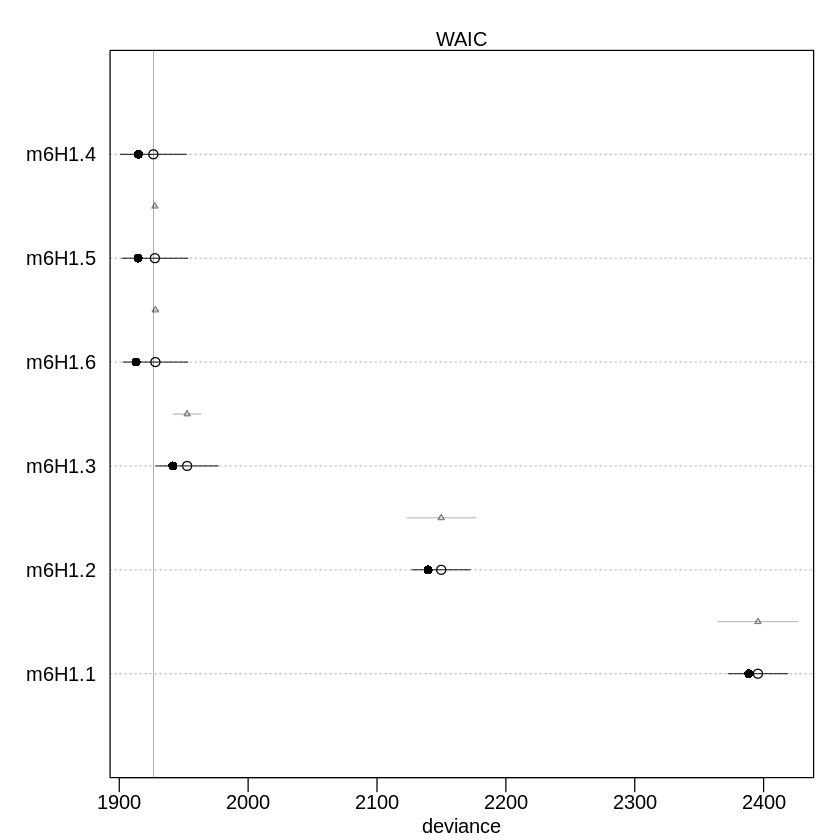

In [35]:
plot(models)

## 6H2

[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]


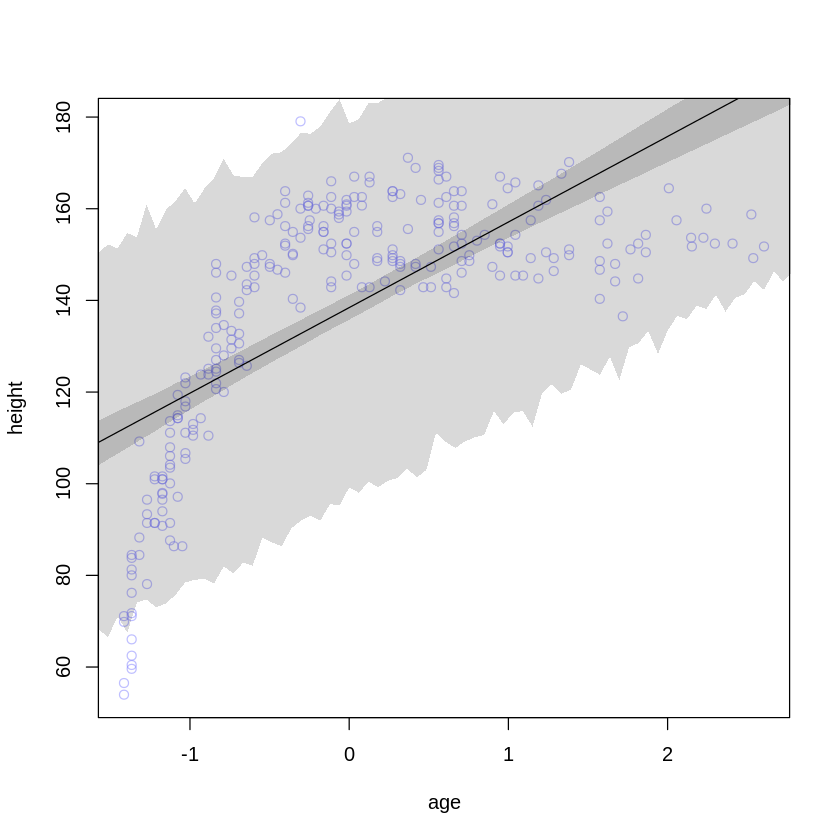

[ 1000 / 1000 ]
[ 1000 / 1000 ]


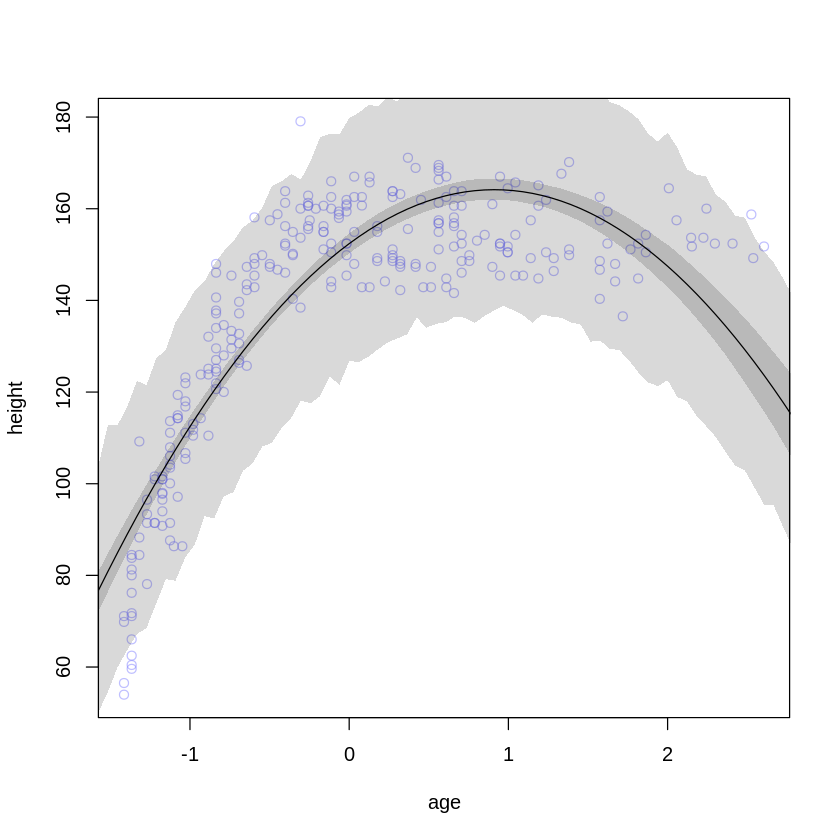

[ 1000 / 1000 ]
[ 1000 / 1000 ]


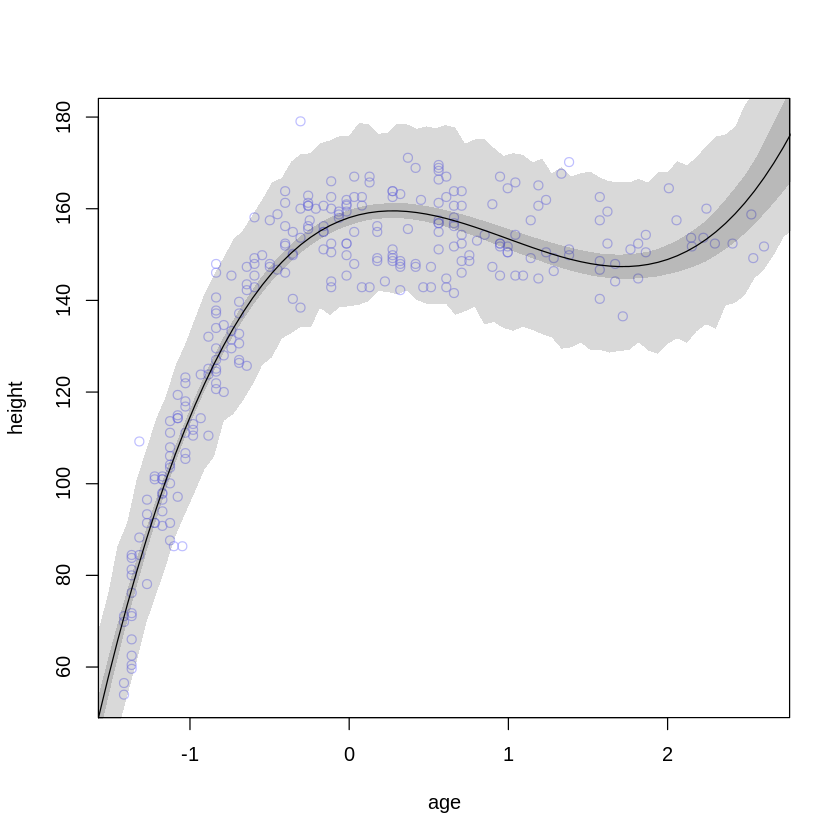

[ 1000 / 1000 ]
[ 1000 / 1000 ]


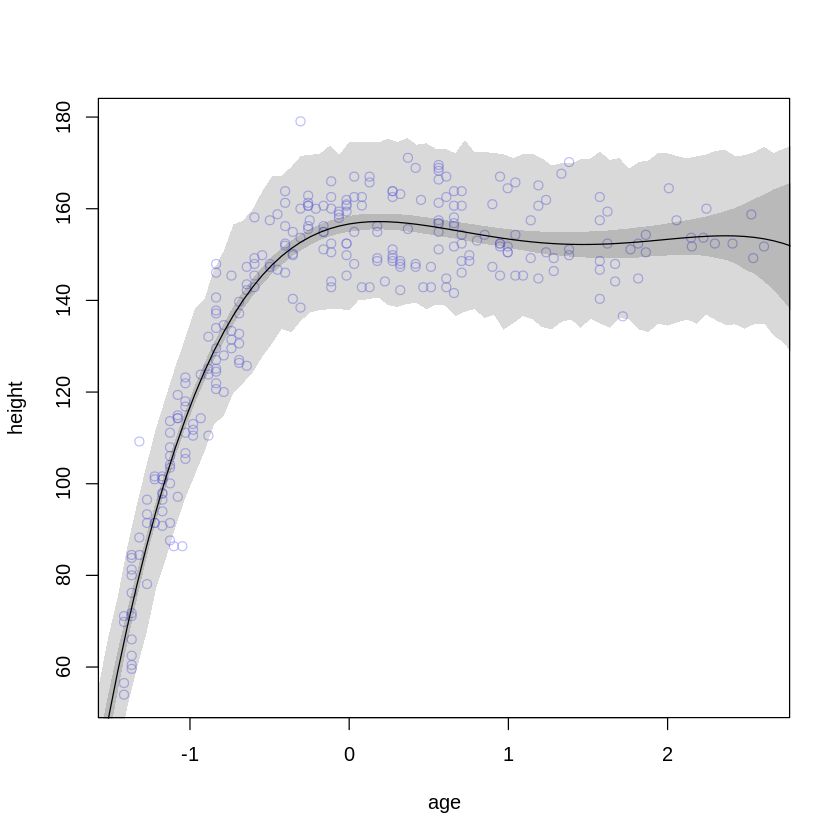

[ 1000 / 1000 ]
[ 1000 / 1000 ]


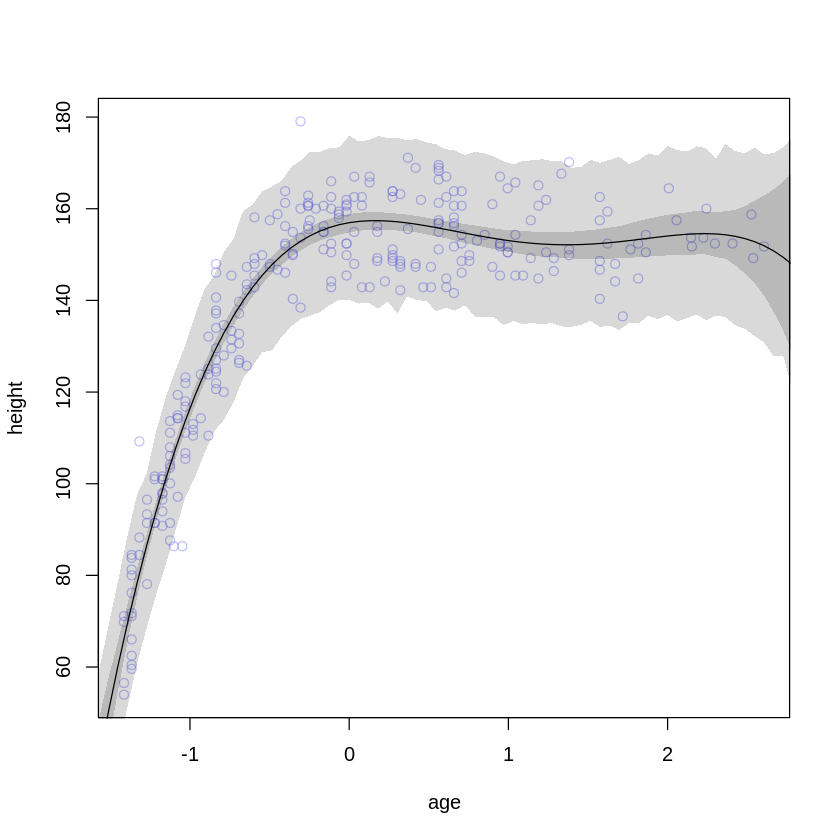

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

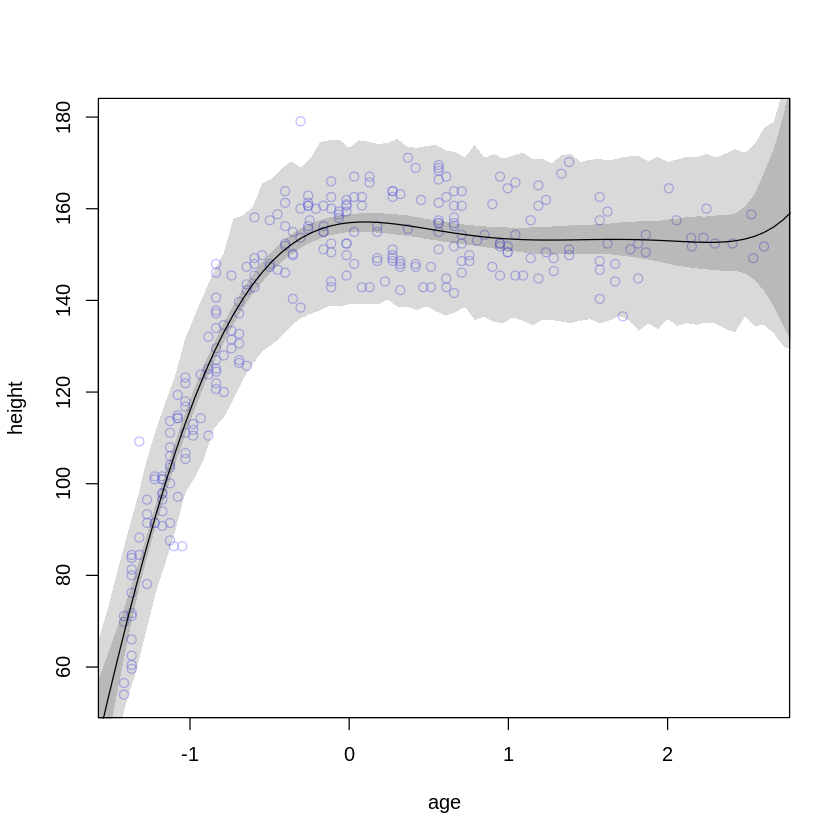

In [56]:
models = c(m6H1.1, m6H1.2, m6H1.3, m6H1.4, m6H1.5, m6H1.6)

plot_res <- function(model)
{
    age.seq <- seq(from = -2, to = 4, length.out = 100)
    pred.dat <- list(age = age.seq, age2 = age.seq^2, age3 = age.seq^3, age4 = age.seq^4, age5 = age.seq^5 , age6 = age.seq^6)
    mu <- link(model, data = pred.dat)
    mu.mean <- apply(mu, 2, mean)
    mu.PI <- apply(mu, 2, PI, prob = 0.97)
    sim.height <- sim(model, data = pred.dat)
    height.PI <- apply(sim.height, 2, PI, prob = 0.97) 
    plot(height ~ age, d1, col = col.alpha(rangi2, 0.5))

    lines(age.seq, mu.mean)
    shade(mu.PI, age.seq)
    shade(height.PI, age.seq)
}



sapply(models, plot_res)

The averaged mean but also the funnel in the unobserved section takes off in one or the other direction

## 6H3
Compute model averaged predictions (using ensemble)

To me it looks like the simulated values have a narrower PI.

Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


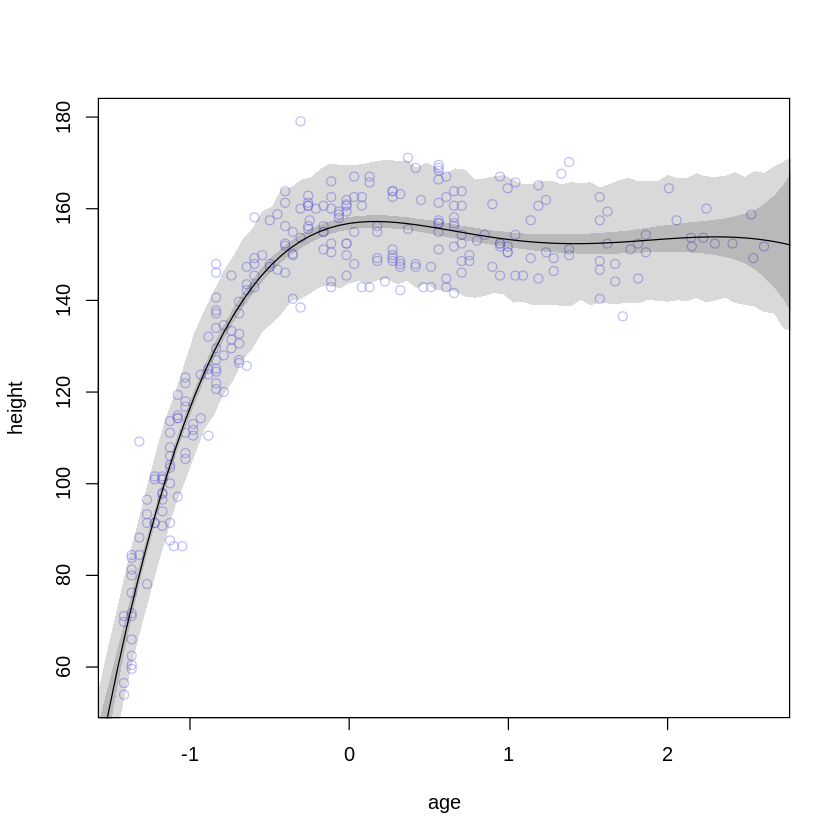

In [85]:

age.seq <- seq(from = -2, to = 4, length.out = 100)

pred.dat <- list(age = age.seq, 
                 age2 = age.seq^2, 
                 age3 = age.seq^3, 
                 age4 = age.seq^4, 
                 age5 = age.seq^5, 
                 age6 = age.seq^6)


ensemble_fit <- ensemble(m6H1.1, m6H1.2,m6H1.3, m6H1.4, m6H1.5, m6H1.6 , data=pred.dat )
mu <- apply(ensemble_fit$link, 2, mean)
mu.PI <- apply(ensemble_fit$link, 2, PI)
sim.height.PI <- apply(ensemble_fit$sim, 2, PI) 
plot(height ~ age, d1, col = col.alpha(rangi2, 0.5))
lines(age.seq, mu)
shade(mu.PI, age.seq)
shade(sim.height.PI, age.seq)


## 6H4

Compute the test - sample deviance for each model. This means calculating deviance, but using the data in d2 now. You can compute the log-likelihood of the height data with:

where mu is a vector of predicted means (based upon age values and MAP parameters) and sigma is the MAP standard deviation.

In [102]:
m1_coef = coef(m6H1.1)

dev1 <- (-2)*sum(dnorm(d2$height, 
                      mean = m1_coef[1] + 
                      m1_coef[2]*d2$age,
                      sd=m1_coef[3], log = TRUE))


m2_coef = coef(m6H1.2)

dev2 <- (-2)*sum(dnorm(d2$height, 
                      mean = m2_coef[1] + 
                      m2_coef[2]*d2$age +
                      m2_coef[3]*d2$age2,
                      sd=m4_coef[4], log = TRUE))


m3_coef = coef(m6H1.3)

dev3 <- (-2)*sum(dnorm(d2$height, 
                      mean = m3_coef[1] + 
                      m3_coef[2]*d2$age +
                      m3_coef[3]*d2$age2 +
                      m3_coef[4]*d2$age3, 
                      sd=m3_coef[5], log = TRUE))


m4_coef <- coef(m6H1.4)

dev4 <- (-2)*sum(dnorm(d2$height, 
                      mean = m4_coef[1] + 
                      m4_coef[2]*d2$age +
                      m4_coef[3]*d2$age2 +
                      m4_coef[4]*d2$age3 +
                      m4_coef[5]*d2$age4, 
                      sd=m4_coef[6], log = TRUE))

m5_coef = coef(m6H1.5)

dev5 <- (-2)*sum(dnorm(d2$height, 
                      m5_coef[1] + 
                      m5_coef[2]*d2$age +
                      m5_coef[3]*d2$age2 +
                      m5_coef[4]*d2$age3 +
                      m5_coef[5]*d2$age4 +
                      m5_coef[6]*d2$age5, 
                      m5_coef[7], log = TRUE))


m6_coef = coef(m6H1.6)

dev6 <- (-2)*sum(dnorm(d2$height, 
                      mean = m6_coef[1] + 
                      m6_coef[2]*d2$age +
                      m6_coef[3]*d2$age2 +
                      m6_coef[4]*d2$age3 +
                      m6_coef[5]*d2$age4 +
                      m6_coef[6]*d2$age5 +
                      m6_coef[7]*d2$age6, 
                      sd=m6_coef[8], log = TRUE))


deviances <- c(dev1,dev2,dev3,dev4,dev5,dev6)
deviances

[1] 2422.093 2137.499 1932.250 1876.569 1878.404 1877.626

## 6H5 

Compare the deviances from 6H4 to the WAIC values. It might be easier to compare if you subtract the smallest value in each list from the others. For example, subtract the minimum WAIC from all of the WAIC values so that the best WAIC is normalized to zero. Which model makes the best out-of-sample predictions in this case? Does WAIC do a good job of estimating the dest deviance?

In [72]:
waics <- sapply(models, WAIC)
waics

Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


[1] 2395.563 2150.379 1952.439 1925.967 1927.587 1928.174

In [77]:
df <- data.frame(deviances = deviances - min(deviances), waics = waics - min(waics))
df

deviances,waics
545.523758,469.595880
260.930478,224.411243
55.681536,26.471739
0.000000,0.000000
1.835347,1.619263
1.057354,2.206422


## M6H6



In [93]:
m6H6 <- map(
  alist (
    height ~ dnorm(mu, sigma),
    mu <- a + b1*age + b2*age2 + b3*age3 + b4*age4 + b5*age5 + b6*age6,
    a ~ dunif(0, 300),
    b1 ~ dnorm(0,5),
    b2 ~ dnorm(0,5),
    b3 ~ dnorm(0,5),
    b4 ~ dnorm(0,5),
    b5 ~ dnorm(0,5),
    b6 ~ dnorm(0,5),
    sigma ~ dunif(0,50)
  ),
  data = d1
)

[ 1000 / 1000 ]
[ 1000 / 1000 ]


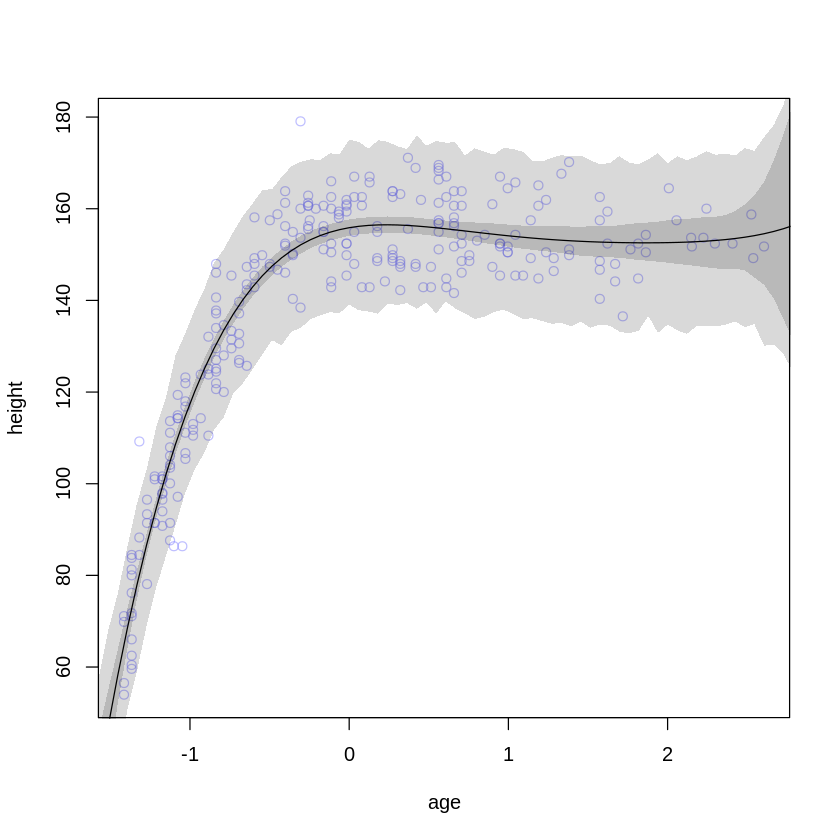

In [98]:
age.seq <- seq(from = -2, to = 4, length.out = 100)
pred.dat <- list(age = age.seq, age2 = age.seq^2, age3 = age.seq^3, age4 = age.seq^4, age5 = age.seq^5 , age6 = age.seq^6)
mu <- link(m6H6, data = pred.dat)
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI, prob = 0.97)
sim.height <- sim(m6H6, data = pred.dat)
height.PI <- apply(sim.height, 2, PI, prob = 0.97) 
plot(height ~ age, d1, col = col.alpha(rangi2, 0.5))

lines(age.seq, mu.mean)
shade(mu.PI, age.seq)
shade(height.PI, age.seq)


In [100]:
m6_coef = coef(m6H6)

dev6 <- (-2)*sum(dnorm(d2$height, 
                      mean = m6_coef[1] + 
                      m6_coef[2]*d2$age +
                      m6_coef[3]*d2$age2 +
                      m6_coef[4]*d2$age3 +
                      m6_coef[5]*d2$age4 +
                      m6_coef[6]*d2$age5 +
                      m6_coef[7]*d2$age6, 
                      sd=m6_coef[8], log = TRUE))

dev6

[1] 1875.433

The out of sample deviance is slighly lower for the model with more regularized priors